<a href="https://colab.research.google.com/github/rayaschein/rayadata110/blob/main/week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
titanic_data = sns.load_dataset('titanic')
titanic_data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
survival_rate_by_gender = titanic_data.groupby('sex')['survived'].mean()
survival_rate_by_gender

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

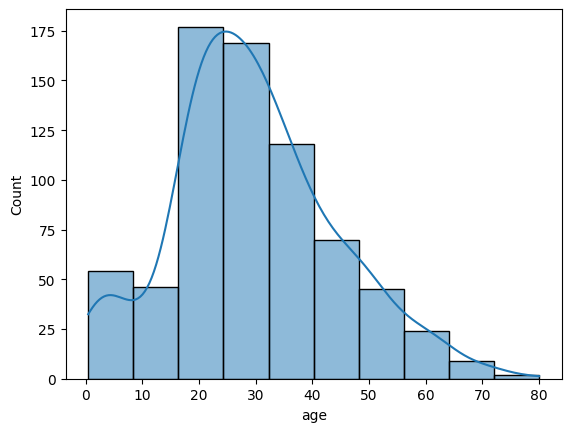

In [ ]:
import matplotlib.pyplot as plt
sns.histplot(data = titanic_data, x = 'age', bins = 10, kde = True)
plt.show()

In [ ]:
survival_rate_by_class = titanic_data.groupby('class')['survived'].mean()
survival_rate_by_class

class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

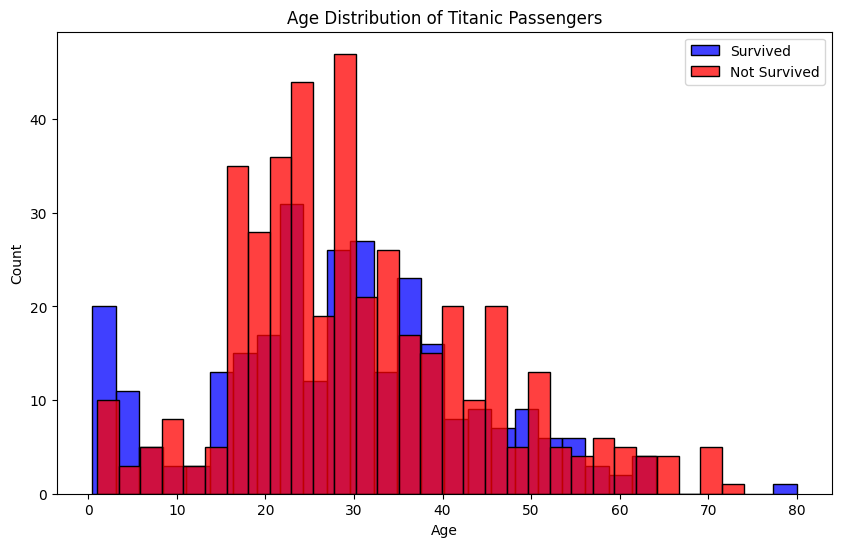

In [ ]:
survivors = titanic_data[titanic_data['survived']==1]
non_survivors = titanic_data[titanic_data['survived']==0]

plt.figure(figsize=(10, 6))
sns.histplot(survivors['age'].dropna(), color='blue', bins=30, label='Survived', kde=False)
sns.histplot(non_survivors['age'].dropna(), color='red', bins=30, label='Not Survived', kde=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Titanic Passengers')
plt.legend()
plt.show()

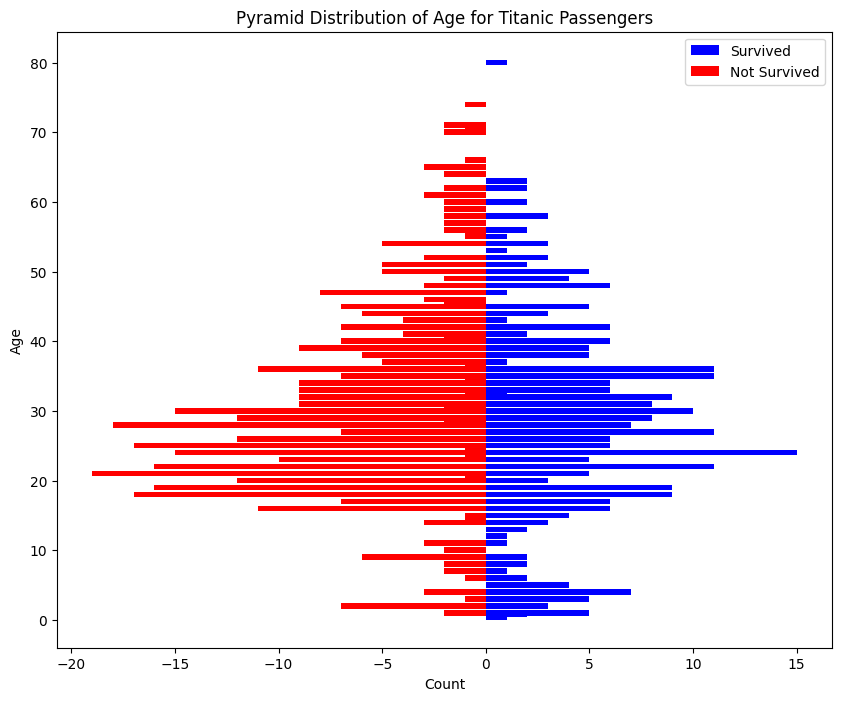

In [ ]:
survivors_age_counts = survivors['age'].value_counts().sort_index().reset_index()
survivors_age_counts.columns = ['Age', 'Count']
non_survivors_age_counts = non_survivors['age'].value_counts().sort_index().reset_index()
non_survivors_age_counts.columns = ['Age', 'Count']
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(survivors_age_counts['Age'], survivors_age_counts['Count'], color='blue', label='Survived')
ax.barh(non_survivors_age_counts['Age'], -non_survivors_age_counts['Count'], color='red', label='Not Survived')
ax.set_xlabel('Count')
ax.set_ylabel('Age')
ax.set_title('Pyramid Distribution of Age for Titanic Passengers')
ax.legend()
plt.show()

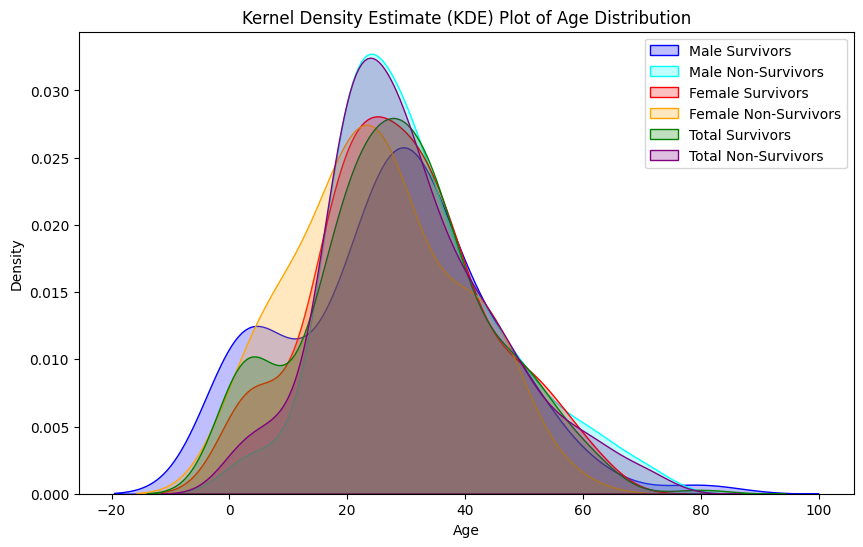

In [ ]:
male_survivors = survivors[survivors['sex'] == 'male']
female_survivors = survivors[survivors['sex'] == 'female']
male_non_survivors = non_survivors[non_survivors['sex'] == 'male']
female_non_survivors = non_survivors[non_survivors['sex'] == 'female']
plt.figure(figsize=(10, 6))
sns.kdeplot(data=male_survivors['age'].dropna(), color='blue', fill=True, label='Male Survivors')
sns.kdeplot(data=male_non_survivors['age'].dropna(), color='cyan', fill=True, label='Male Non-Survivors')
sns.kdeplot(data=female_survivors['age'].dropna(), color='red', fill=True, label='Female Survivors')
sns.kdeplot(data=female_non_survivors['age'].dropna(), color='orange', fill=True, label='Female Non-Survivors')
sns.kdeplot(data=survivors['age'].dropna(), color='green', fill=True, label='Total Survivors')
sns.kdeplot(data=non_survivors['age'].dropna(), color='purple', fill=True, label='Total Non-Survivors')
plt.title('Kernel Density Estimate (KDE) Plot of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

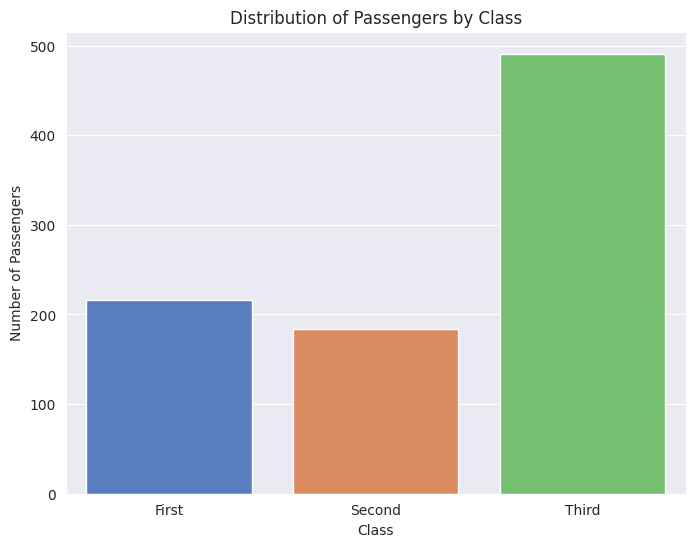

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=titanic_data, hue='class', palette='muted')
sns.set_style('darkgrid')
plt.title('Distribution of Passengers by Class')
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.show()

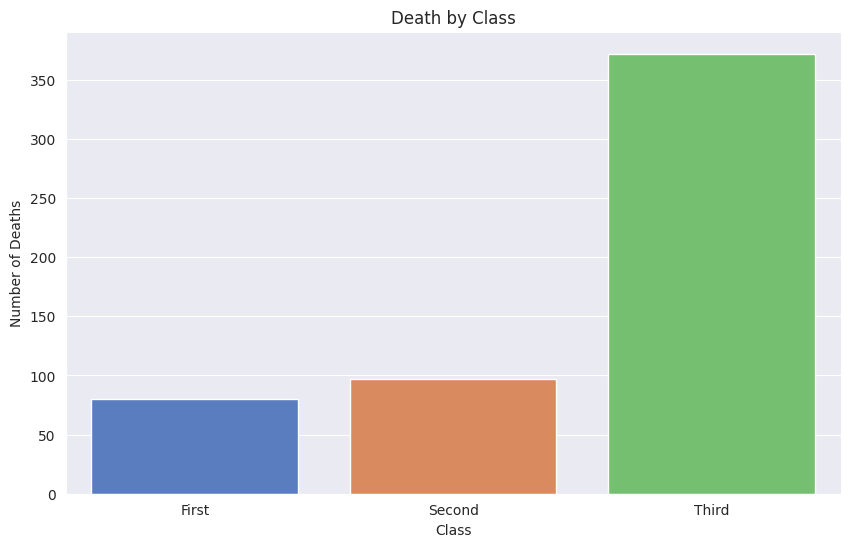

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=non_survivors, hue='class', palette='muted')
sns.set_style('darkgrid')
plt.title('Death by Class')
plt.xlabel('Class')
plt.ylabel('Number of Deaths')
plt.show()